### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

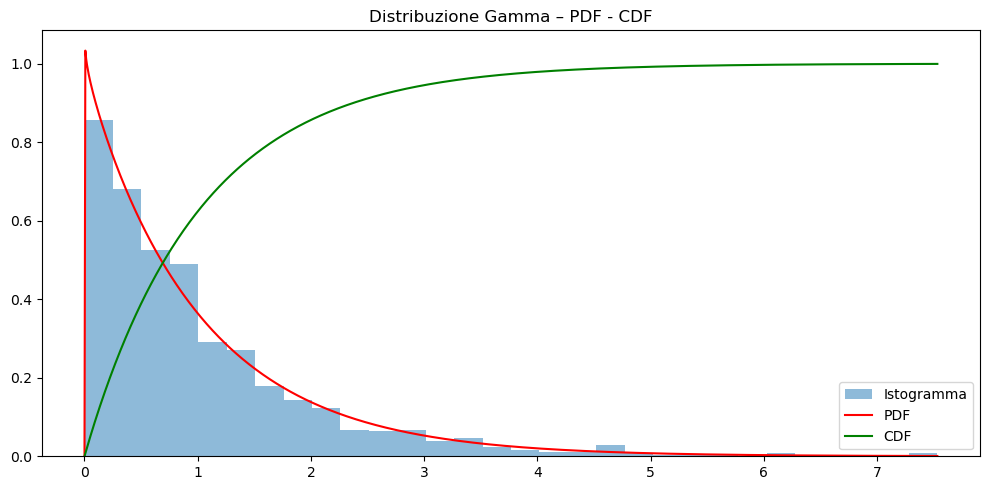

Varianza: 1.122


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

campione = gamma.rvs(a=1, size=1000)

shape, loc, scale = gamma.fit(campione)

x = np.linspace(0, np.max(campione), 1000)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
cdf = gamma.cdf(x, shape, loc=loc, scale=scale)

plt.figure(figsize=(10, 5))
plt.hist(campione, bins=30, density=True, alpha=0.5, label="Istogramma")
plt.plot(x, pdf, color="red", label="PDF")
plt.plot(x, cdf, color="green", label="CDF")
plt.title("Distribuzione Gamma – PDF - CDF")
plt.legend()
plt.tight_layout()
plt.show()

print("Varianza:", round(np.var(campione), 3))


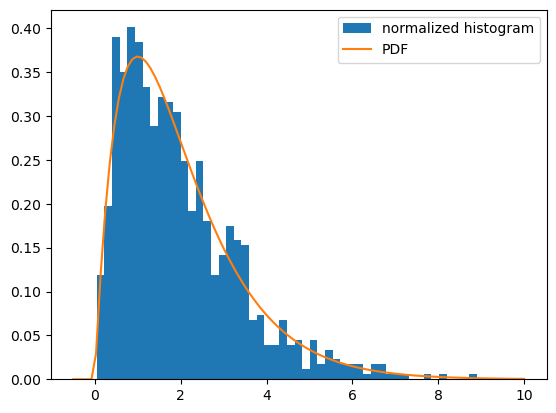

In [47]:
# soluzione prof
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math


dist = sp.stats.gamma(a=2, scale=1)
sample = dist.rvs(size=1000)#random variate sample
#print(sample)

plt.hist(sample, bins=50, density= True, label='normalized histogram')
x = np.linspace(-0.5, 10, 100)
plt.plot(x, dist.pdf(x), label='PDF')
plt.legend()
plt.show()

In [48]:
forma, loc, scala = sp.stats.gamma.fit(sample)
print(forma)

1.898175721920946


In [49]:
#Calcola la funzione di distribuzione comulativa (CDF) per un valore specifico
cdf_value = dist.cdf(2)
print("CDF:", cdf_value)

#Calcola la funzione di distribuzione comulativa inversa (PPF) per una probabilita specifica
ppf_value = dist.ppf(0.5)
print("PPF:", ppf_value)

#Calcola il momento n-esimo della distribuzione
moment_value = dist.moment(2) #Secondo momento
print("Second moment:", moment_value)

#Calcola la media della distribuzione
mean_value = dist.mean()
print("Mean:", mean_value)

#Calcola la varianza della distribuzione
variance_value = dist.var()
print("Variance:", variance_value)

#Calcola la deviazione standard della distribuzione
std_dev_value = dist.std()
print("Standard Deviation:", std_dev_value)

CDF: 0.5939941502901616
PPF: 1.6783469900166612
Second moment: 6.0
Mean: 2.0
Variance: 2.0
Standard Deviation: 1.4142135623730951


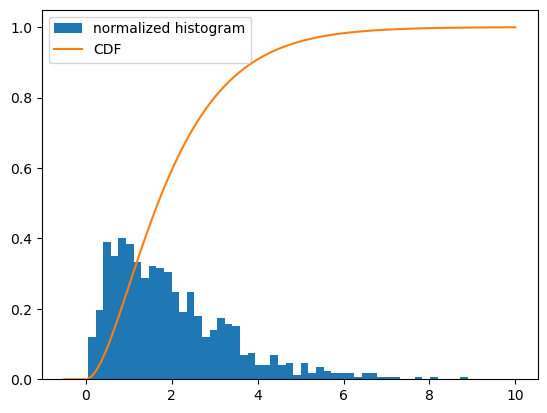

In [50]:
plt.hist(sample, bins=50, density=True, label='normalized histogram')
plt.plot(x, dist.cdf(x), label='CDF')
plt.legend()
plt.show()

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

MAE (temp_max): 0.65
RMSE (temp_max): 0.76
MAE (temp_min): 1.73
RMSE (temp_min): 2.29


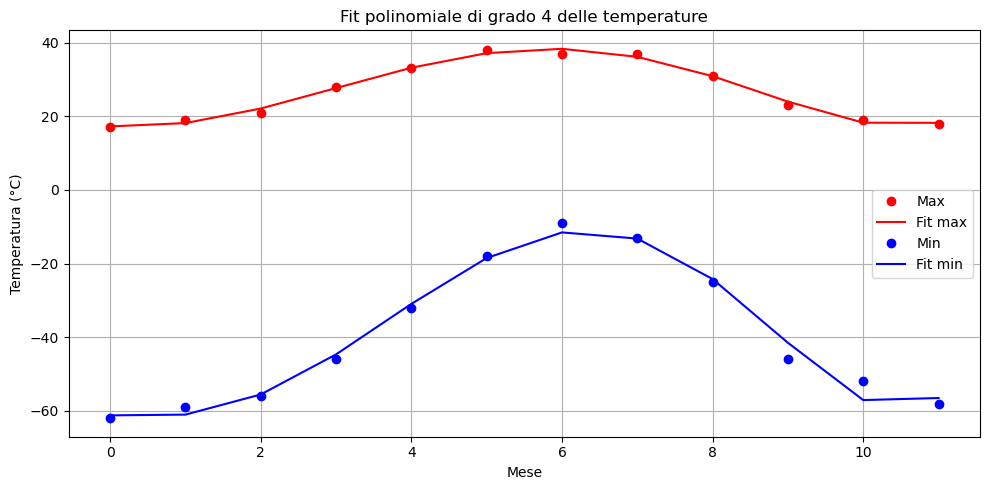

In [51]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)


fit_max = np.poly1d(np.polyfit(months, temp_max, 5)) # 5 sembrava il più adatto senza esagerare
fit_min = np.poly1d(np.polyfit(months, temp_min, 5))

pred_max = fit_max(months)
pred_min = fit_min(months)

mae_max = np.mean(np.abs(temp_max - pred_max))
rmse_max = np.sqrt(np.mean((temp_max - pred_max)**2))

mae_min = np.mean(np.abs(temp_min - pred_min))
rmse_min = np.sqrt(np.mean((temp_min - pred_min)**2))

print("MAE (temp_max):", round(mae_max, 2))
print("RMSE (temp_max):", round(rmse_max, 2))
print("MAE (temp_min):", round(mae_min, 2))
print("RMSE (temp_min):", round(rmse_min, 2))

plt.figure(figsize=(10, 5))
plt.plot(months, temp_max, "ro", label="Max")
plt.plot(months, pred_max, "r-", label="Fit max")
plt.plot(months, temp_min, "bo", label="Min")
plt.plot(months, pred_min, "b-", label="Fit min")
plt.xlabel("Mese")
plt.ylabel("Temperatura (°C)")
plt.title("Fit polinomiale di grado 4 delle temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

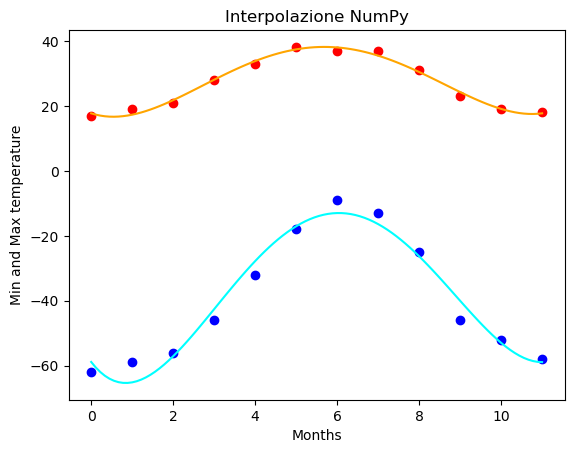

MAE (temp_max) NumPy: 0.7811771561771748
MAE (temp_min) NumPy: 2.9569735819737524
RMSE (temp_max) NumPy: 0.9301038867208522
RMSE (temp_min) NumPy: 3.487912490377803


In [52]:
#soluzione prof
x_int = np.linspace(0, 11, 100)
coeffs_1 = np.polyfit(months, temp_max, 4)
y_np_int_1 = np.polyval(coeffs_1, x_int)
coeffs_2 = np.polyfit(months, temp_min, 4)
y_np_int_2 = np.polyval(coeffs_2, x_int)

plt.title("Interpolazione NumPy")
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Months")
plt.ylabel("Min and Max temperature")
plt.plot(x_int, y_np_int_1, color='orange')
plt.plot(x_int, y_np_int_2, color='cyan')
plt.show()

y_np_int_1_interp = np.interp(months, x_int, y_np_int_1)
y_np_int_2_interp = np.interp(months, x_int, y_np_int_2)

mae_np = np.mean(np.abs(temp_max - y_np_int_1_interp))
mae_np2 = np.mean(np.abs(temp_min - y_np_int_2_interp))
print("MAE (temp_max) NumPy:", mae_np)
print("MAE (temp_min) NumPy:", mae_np2)
rmse_np = np.sqrt(np.mean((temp_max - y_np_int_1_interp)**2))
rmse_np2 = np.sqrt(np.mean((temp_min - y_np_int_2_interp)**2))
print("RMSE (temp_max) NumPy:", rmse_np)
print("RMSE (temp_min) NumPy:", rmse_np2)

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Modello lineare: mpg = -0.0412 * disp + 29.5999


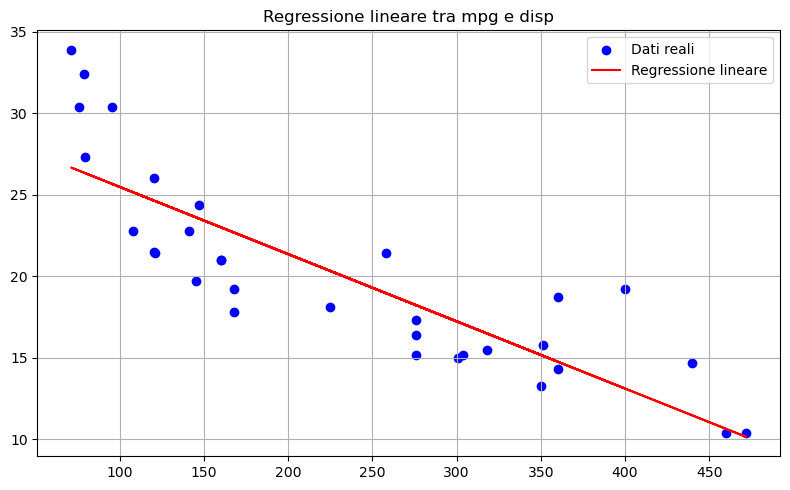

MAE: 2.61
RMSE: 3.15


In [53]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
# df.head()

x = df['disp'].values
y = df['mpg'].values

coeffs = np.polyfit(x, y, 1)
m, q = coeffs
print(f"Modello lineare: mpg = {m:.4f} * disp + {q:.4f}")

y_pred = m * x + q

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Dati reali')
plt.plot(x, y_pred, color='red', label='Regressione lineare')
plt.title("Regressione lineare tra mpg e disp")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred)**2))

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
